Saving loan_data.csv.xlsx to loan_data.csv (4).xlsx
🔹 Data Loaded Successfully!

📋 First 5 Rows:
    Applicant_ID  Age  Income     Education  Credit_Score Marital_Status  \
0          1001   29   32000  Not Graduate           558        Married   
1          1002   27   28000      Graduate           610         Single   
2          1003   29   32000  Not Graduate           646         Single   
3          1004   35   34000  Not Graduate           543         Single   
4          1005   36   56000  Not Graduate           638         Single   

  Employment_Type  Loan_Amount  Loan_Term  Loan_Status  
0   Self-Employed        75000         36            1  
1        Salaried       165000         24            0  
2   Self-Employed       165000         12            0  
3   Self-Employed       160000         48            1  
4   Self-Employed        70000         36            0  

📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1

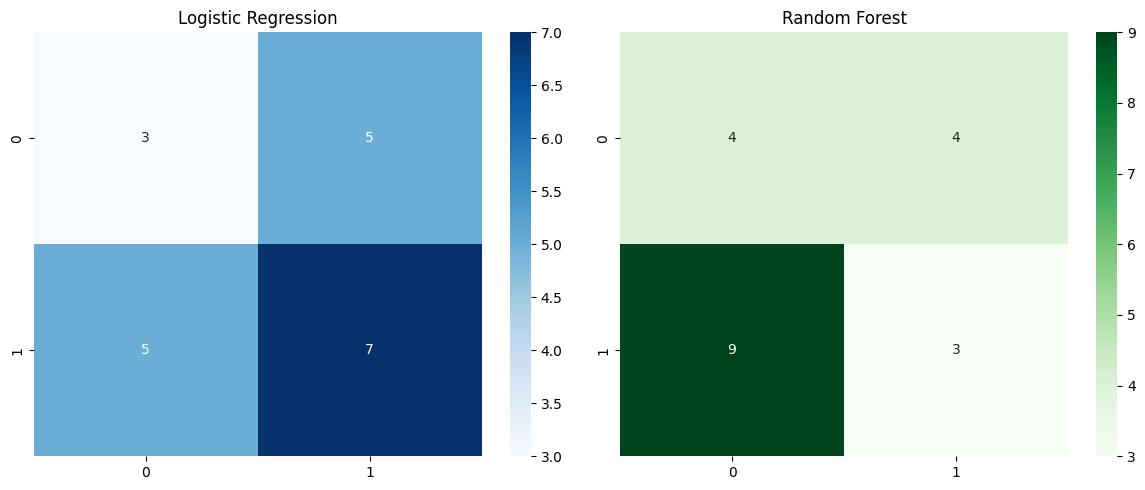

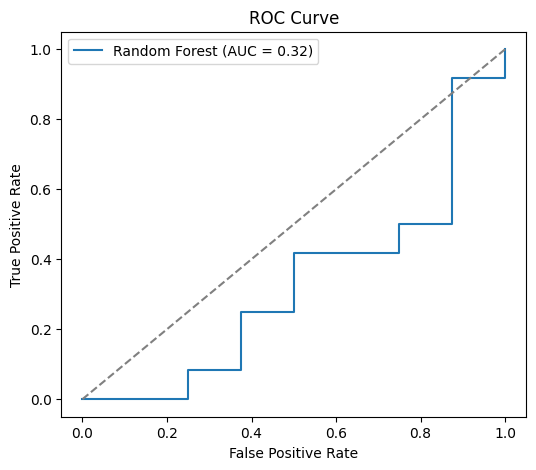

In [9]:
# ✅ Step 1: Upload Excel File in Google Colab
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()  # Upload .xlsx file manually
filename = next(iter(uploaded))  # Get actual filename

# ✅ Step 2: Read Excel File
df = pd.read_excel(io.BytesIO(uploaded[filename]))
print("🔹 Data Loaded Successfully!")

# ✅ Step 3: Quick Data Overview
print("\n📋 First 5 Rows:\n", df.head())
print("\n📋 Dataset Info:")
df.info()
print("\n❓ Missing Values:\n", df.isnull().sum())

# ✅ Step 4: Preprocessing
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])            # Graduate=1, Not Graduate=0
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])  # Married=1, Single=0
df['Employment_Type'] = le.fit_transform(df['Employment_Type'])  # Salaried=1, Self-Employed=0

# ✅ Step 5: Feature Selection
X = df.drop(['Applicant_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

# ✅ Step 6: Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 7: Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Step 8: Model Training - Logistic Regression
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

# ✅ Step 9: Model Training - Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# ✅ Step 10: Predictions
log_preds = log_model.predict(X_test_scaled)
rf_preds = rf_model.predict(X_test_scaled)

# ✅ Step 11: Evaluation
from sklearn.metrics import classification_report, confusion_matrix

print("\n📊 Logistic Regression Report:\n", classification_report(y_test, log_preds))
print("📊 Random Forest Report:\n", classification_report(y_test, rf_preds))

# ✅ Step 12: Confusion Matrices
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, log_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest")
plt.tight_layout()
plt.show()

# ✅ Step 13: ROC Curve for Random Forest
from sklearn.metrics import roc_curve, roc_auc_score

rf_probs = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, rf_probs)
roc_auc = roc_auc_score(y_test, rf_probs)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
